# Web Scraping for Reddit & Predicting Comments

In [2]:
import requests
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Building My Scraper

In [ ]:
# attempt 1

end = ''
number = 0
for i in range(90):
    url = 'https://www.reddit.com/hot/' + end
    response = requests.get(url, headers= {'User-Agent': 'ChiliDawg'})
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    titles = [title.text for title in soup.find_all('a', {'data-event-action':'title'})]
    all_subr = [subr.text for subr in soup.find_all('a', {'class':'subreddit hover may-blank'})]
    times = [time.text for time in soup.find_all('time', {'class':'live-timestamp'})]
    timestamps = [time['datetime'] for time in soup.find_all('time', {'class':'live-timestamp'})]
    comments = [comment.text for comment in soup.find_all('a', {'data-event-action':'comments'})]
    scores2 = []
    scores = soup.find_all('div', {'class':'score unvoted'})
    for m in scores:
        try:
            scores2.append(m['title'])
        except:
            scores2.append(0)
    report = soup.find_all('div', {'data-context':'listing'})
    last_id_1 = report[-1]
    last_id_2 = last_id_1['id']
    last_id_3 = last_id_2.split('thing_')[1]
    number += 25
    end = '?count=' + str(number) + '&after=' + str(last_id_3)
    #a_href = soup.find('a', {'rel':'nofollow next'})
    #url = a_href['href']
    df = pd.DataFrame({'title':titles, 'time':times, 'timestamps':timestamps, 'subreddits':all_subr, 
                       'comments':comments, 'score':scores2}) 
    reddit = reddit.append(df)
    


In [ ]:
# test to figure out why my scraper kept on failing

end = ''
number = 0
pidn_list = []
for i in range(1000):
    try: 
        url = 'https://www.reddit.com/hot/' + end
        response = requests.get(url, headers= {'User-Agent': 'ChiliDawg'})
        html = response.text
        soup = BeautifulSoup(html, 'lxml')
        all_div = soup.find_all('div')
        post_id = []
        for k in all_div:
            if k.has_attr('data-fullname'):
                post_id.append(k['data-fullname'])
        pidn_list.append(len(post_id))
        last_id_1 = post_id[-1]
        #number += 25
        end = '?count=25&after=' + str(last_id_1)
    except:
        pass

In [ ]:
# working scraper

reddit = pd.DataFrame(columns=['title', 'time', 'timestamps', 'subreddits', 'comments', 'crossposts', 'score', 'post_id'])
end = ''
number = 0
for i in range(100):
    bad_urls = []
    url = 'https://www.reddit.com/hot/' + end
    response = requests.get(url, headers= {'User-Agent': 'McGuy'})
    if response.status_code != 200:
            print("Error: Status code: " + str(response.status_code))
    try:
        html = response.text
        soup = BeautifulSoup(html, 'lxml')
        all_div = soup.find_all('div')
        titles = [title.text for title in soup.find_all('a', {'data-event-action':'title'})]
        times = [time.text for time in soup.find_all('time', {'class':'live-timestamp'})]
        post_id = []
        all_subr = []
        timestamps = []
        comments = []
        scores = []
        crossposts = []
        for k in all_div:
            if k.has_attr('data-fullname'):
                post_id.append(k['data-fullname'])
                comments.append(k['data-comments-count'])
                scores.append(k['data-score'])
                crossposts.append(k['data-num-crossposts'])
                timestamps.append(k['data-timestamp'])
                all_subr.append(k['data-subreddit-prefixed'])
        if len(post_id) == 25:
            last_id_1 = post_id[-1]
            number += 25
            end = '?count=' + str(number) + '&after=' + str(last_id_1)
        else:
            print(url)
            bad_urls.append(url)
            pass
    except:
        print(url)
        bad_urls.append(url)
        pass
    df = pd.DataFrame({'title':titles, 
                       'time':times, 
                       'timestamps':timestamps, 
                       'subreddits':all_subr, 
                       'comments':comments, 
                       'crossposts':crossposts, 
                       'score':scores, 
                       'post_id':post_id}) 
    reddit = reddit.append(df)


In [ ]:
# working random scraper
reddit2 = pd.DataFrame(columns=['title', 'time', 'timestamps', 'subreddits', 'comments', 'crossposts', 'score', 'post_id'])

for i in range(10):
    bad_urls = []
    url = 'https://www.reddit.com/r/random/'
    try:
        g = random.randint(1,6)
        for l in range(g):
            response = requests.get(url, headers= {'User-Agent': 'McGuy'})
            if response.status_code != 200:
                    print("Error: Status code: " + str(response.status_code))
            html = response.text
            soup = BeautifulSoup(html, 'lxml')
            a_href = soup.find('a', {'rel':'nofollow next'})
            url = a_href['href']
        all_div = soup.find_all('div')
        titles = [title.text for title in soup.find_all('a', {'data-event-action':'title'})]
        times = [time.text for time in soup.find_all('time', {'class':'live-timestamp'})]
        post_id = []
        all_subr = []
        timestamps = []
        comments = []
        scores = []
        crossposts = []
        for k in all_div:
            if k.has_attr('data-fullname'):
                post_id.append(k['data-fullname'])
                comments.append(k['data-comments-count'])
                scores.append(k['data-score'])
                crossposts.append(k['data-num-crossposts'])
                timestamps.append(k['data-timestamp'])
                all_subr.append(k['data-subreddit-prefixed'])
        q = random.randint(0,(len(post_id)-1))
        titles = [titles[q]]
        times = [times[q]]
        post_id = [post_id[q]]
        all_subr = [all_subr[q]]
        timestamps = [timestamps[q]]
        comments = [comments[q]]
        scores = [scores[q]]
        crossposts = [crossposts[q]]
        df2 = pd.DataFrame({'title':titles, 
                           'time':times, 
                           'timestamps':timestamps, 
                           'subreddits':all_subr, 
                           'comments':comments, 
                           'crossposts':crossposts, 
                           'score':scores, 
                           'post_id':post_id}) 
        reddit2 = reddit2.append(df2)
    except:
        print(url)
        bad_urls.append(url)
        pass
    
reddit2.to_csv('reddit2.csv')


# Data Cleaning, Feature Engineering

### After running my two scrapers on Python Anywhere and downloading the CSVs

In [3]:
# import data
reddithot = pd.read_csv("/Users/christophermarker/Documents/DSI7/Data/Project_3/reddit.csv")

In [4]:
# drop uneeded column
reddithot.drop('Unnamed: 0', axis=1, inplace=True) 

In [5]:
# sort by largest number of comments then drop all duplicates, only keeping the first
reddithot = reddithot.sort_values('comments', ascending=False).drop_duplicates('post_id').sort_index()

In [6]:
# make all of the 'time since posts' the same format
reddithot['time'].replace({'just now':'.5 minutes ago'}, inplace=True)

In [7]:
# make all of the 'time since posts' the same format
reddithot['time'].replace({'1 minute ago':'1 minutes ago'}, inplace=True)

In [8]:
# make all of the 'time since posts' the same format
reddithot['time'].replace({'1 hour ago':'1 hours ago'}, inplace=True)

In [9]:
# make all of the 'time since posts' the same format
reddithot['time'].replace({'1 day ago':'24 hours ago'}, inplace=True)

In [10]:
# remove 'ago'
reddithot['time'] = reddithot['time'].map(lambda x: x.split(' ago')[0])

In [11]:
# make a new columsn showing the units
reddithot['time_units'] = reddithot['time'].map(lambda x: x.split(' ')[1])

In [12]:
# remove the units from the time column
reddithot['time'] = reddithot['time'].map(lambda x: x.split(' ')[0])

In [13]:
# make the multiplier for hours --> minutes
reddithot['time_units'].replace({'hours':'60'}, inplace=True)

In [14]:
# make the multiplier for minutes --> minutes
reddithot['time_units'].replace({'minutes':'1'}, inplace=True)

In [15]:
# make the unit multipliers floats
reddithot['time_units'] = reddithot['time_units'].astype(float)

In [16]:
# make the times floats
reddithot['time'] = reddithot['time'].astype(float)

In [17]:
# convert all times into minutes
reddithot['time_minutes'] = reddithot['time'] * reddithot['time_units']

In [18]:
# remove unneeded columns
reddithot.drop(['time','time_units'], axis=1, inplace=True)

In [19]:
# engineer comments per minute
reddithot['comments_per_minute'] = reddithot['comments'] / reddithot['time_minutes']

In [20]:
# engineer likes per minute
reddithot['likes_per_minute'] = reddithot['score'] / reddithot['time_minutes']

In [21]:
# make the timestamps usable
reddithot['timestamps'] = pd.to_datetime(reddithot['timestamps'], unit='ms')

In [22]:
# convert from UTC to EST
reddithot['timestamps'] = reddithot['timestamps'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
# this code provided by Josh Sung

In [23]:
# extract the hour posted from the timestamp
reddithot['hour_posted'] = reddithot.timestamps.dt.hour

In [24]:
# convert the hour posted from UTC to EST
reddithot['hour_posted'] = [x - 5 if x >=5 else x + 19 for x in reddithot['hour_posted']]

In [25]:
# create dummy variables and append them to the dataframe
reddithot = pd.concat([reddithot, pd.get_dummies(reddithot['hour_posted'], prefix=True, drop_first=True)], axis=1)

In [26]:
# get dummy variables for subreddit
reddithot = pd.concat([reddithot, pd.get_dummies(reddithot['subreddits'], drop_first=True)], axis=1)

In [27]:
# engineer a feature if scraped from the 'hot' reddit page
reddithot['hot?'] = 1

In [28]:
# engineer y variable
reddithot['above_median_comments?'] = [0 if x <= (np.median(reddithot.comments.values)) else 1 for x in reddithot['comments']]

In [29]:
# engineer possible alternative y variable
reddithot['above_median_cpm?'] = [0 if x <= (np.median(reddithot.comments_per_minute.values)) else 1 for x in reddithot['comments_per_minute']]

In [30]:
# reset the index
reddithot = reddithot.reset_index()

In [31]:
# drop the old index column
reddithot.drop(['index'], axis=1, inplace=True)

In [32]:
# import data from the random 
reddit_random = pd.read_csv("/Users/christophermarker/Documents/DSI7/Data/Project_3/reddit2.csv")

In [33]:
# all of the above combined into a function to clean the random scraper
def data_cleaner(dataframe):
    dataframe.drop('Unnamed: 0', axis=1, inplace=True)
    dataframe = dataframe.sort_values('comments', ascending=False).drop_duplicates('post_id').sort_index()
    dataframe['time'].replace({'just now':'.5 minutes ago'}, inplace=True)
    dataframe['time'].replace({'1 minute ago':'1 minutes ago'}, inplace=True)
    dataframe['time'].replace({'1 hour ago':'1 hours ago'}, inplace=True)
    dataframe['time'].replace({'1 day ago':'1 days ago'}, inplace=True)
    dataframe['time'].replace({'1 week ago':'1 weeks ago'}, inplace=True)
    dataframe['time'].replace({'1 month ago':'1 months ago'}, inplace=True)
    dataframe['time'].replace({'1 year ago':'1 years ago'}, inplace=True)
    dataframe['time'] = dataframe['time'].map(lambda x: x.split(' ago')[0])
    dataframe['time_units'] = dataframe['time'].map(lambda x: x.split(' ')[1])
    dataframe['time'] = dataframe['time'].map(lambda x: x.split(' ')[0])
    dataframe['time_units'].replace({'years':'525600'}, inplace=True)
    dataframe['time_units'].replace({'months':'43804.8'}, inplace=True)
    dataframe['time_units'].replace({'weeks':'10080'}, inplace=True)
    dataframe['time_units'].replace({'days':'1440'}, inplace=True)
    dataframe['time_units'].replace({'hours':'60'}, inplace=True)
    dataframe['time_units'].replace({'minutes':'1'}, inplace=True)
    dataframe['time_units'] = dataframe['time_units'].astype(float)
    dataframe['time'] = dataframe['time'].astype(float)
    dataframe['time_minutes'] = dataframe['time'] * dataframe['time_units']
    dataframe.drop(['time','time_units'], axis=1, inplace=True)
    dataframe['comments_per_minute'] = dataframe['comments'] / dataframe['time_minutes']
    dataframe['likes_per_minute'] = dataframe['score'] / dataframe['time_minutes']
    dataframe['timestamps'] = pd.to_datetime(dataframe['timestamps'], unit='ms')
    dataframe['timestamps'] = dataframe['timestamps'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
    dataframe['hour_posted'] = dataframe.timestamps.dt.hour
    dataframe['hour_posted'] = [x - 5 if x >=5 else x + 19 for x in dataframe['hour_posted']]
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['hour_posted'], prefix=True, drop_first=True)], axis=1)
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['subreddits'], drop_first=True)], axis=1)
    dataframe['hot?'] = 0
    dataframe['above_median_comments?'] = [0 if x <= (np.median(dataframe.comments.values)) else 1 for x in dataframe['comments']]
    dataframe['above_median_cpm?'] = [0 if x <= (np.median(dataframe.comments_per_minute.values)) else 1 for x in dataframe['comments_per_minute']]
    dataframe = dataframe.reset_index()
    dataframe.drop(['index'], axis=1, inplace=True)
    
    return dataframe

In [34]:
# clean the random scraper
reddit_random = data_cleaner(reddit_random)

In [35]:
# combine the two cleaned dataframes
reddit_combined = reddithot.append(reddit_random)

In [36]:
# remove duplicates (there were only a few)
reddit_combined = reddit_combined.sort_values('comments', ascending=False).drop_duplicates('post_id').sort_index()

In [37]:
# reset the index
reddit_combined = reddit_combined.reset_index()

In [38]:
reddit_combined.drop(['index'], axis=1, inplace=True)

In [39]:
reddit_combined = reddit_combined.fillna(0)

Histograms of different words 
Bar charts of different words
Distributions of other data points
Extract the feature importances of random forest - bar chart of which subreddits contain which feature 

# Lemmatization

### I decided to go with lemmatization rather than stemming after examining the results of both
### Some methods adapted from https://stackoverflow.com/questions/43795310/apply-porters-stemmer-to-a-pandas-column-for-each-word

In [40]:
# instantiate tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [41]:
# decided to use lemmatization rather than stemming
# p_stemmer = PorterStemmer()

In [42]:
# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [43]:
# make all strings lowercase and tokenize each title
reddithot['tokenized'] = reddithot['title'].str.lower().map(lambda x: tokenizer.tokenize(x))

In [44]:
# decided to use lemmatization rather than stemming
# reddithot['stemmed'] = reddithot['tokenized'].apply(lambda x : [p_stemmer.stem(y) for y in x])

In [45]:
# lemmatize each title
reddithot['lemmatized'] = reddithot['tokenized'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x])

In [46]:
# turn the lemmatized titles back into sentence form for analysis
reddithot['lemmatized_title'] = reddithot['lemmatized'].apply(lambda x : " ".join(x))

In [47]:
# same thing for the combined dataframe
def lemmatize(dataframe):
    dataframe['tokenized'] = dataframe['title'].str.lower().map(lambda x: tokenizer.tokenize(x))
    dataframe['lemmatized'] = dataframe['tokenized'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
    dataframe['lemmatized_title'] = dataframe['lemmatized'].apply(lambda x : " ".join(x))
    
    return dataframe

reddit_combined = lemmatize(reddit_combined)

In [48]:
# lemmatized_title

# Count Vectorizer for 'hot' threads

In [49]:
y = reddithot['above_median_cpm?']
X = reddithot.drop(['comments', 'post_id', 'subreddits', 'timestamps', 'title', 'time_minutes',
                   'comments_per_minute', 'likes_per_minute', 'above_median_cpm?', 'above_median_comments?', 'tokenized', 
                   'lemmatized', 'hour_posted', 'hot?', 'score'], axis=1)

In [50]:
y = reddithot['above_median_comments?']
X = reddithot.drop(['comments', 'post_id', 'subreddits', 'timestamps', 'title', 'time_minutes',
                   'comments_per_minute', 'likes_per_minute', 'above_median_comments?', 'above_median_cpm?', 'tokenized', 
                   'lemmatized', 'hour_posted', 'hot?'], axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.35)

In [52]:

count = CountVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))

In [53]:
X_train_matrix = count.fit_transform(X_train['lemmatized_title'])

In [54]:
X_test_matrix = count.transform(X_test['lemmatized_title'])

In [55]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                     columns=count.get_feature_names(),
                         index=X_train.index)

In [56]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                     columns=count.get_feature_names(),
                        index=X_test.index)

In [57]:
X_train = X_train.drop('lemmatized_title', axis=1)

X_test = X_test.drop('lemmatized_title', axis=1)            

In [58]:
X_train = pd.concat([X_train, X_train_df], axis=1)

X_test  = pd.concat([X_test, X_test_df], axis=1)

In [59]:
len(count.vocabulary_)

1000

In [60]:
freqs = [(word, X_matrix.getcol(idx).sum()) for word, idx in count.vocabulary_.items()]
#sort from largest to smallest
print(sorted(freqs, key = lambda x: -x[1]))

NameError: name 'X_matrix' is not defined

In [ ]:
zip(count.get_feature_names(),
    np.asarray(X_train.sum(axis=0)).ravel())

# TFIDF Vectorizer for 'hot' threads

In [61]:
y = reddithot['above_median_cpm?']
X = reddithot.drop(['comments', 'post_id', 'subreddits', 'timestamps', 'title', 'time_minutes',
                   'comments_per_minute', 'likes_per_minute', 'above_median_cpm?', 'above_median_comments?', 'tokenized', 
                   'lemmatized', 'hour_posted', 'hot?', 'score'], axis=1)

In [62]:
y = reddithot['above_median_comments?']
X = reddithot.drop(['comments', 'post_id', 'subreddits', 'timestamps', 'title', 'time_minutes',
                   'comments_per_minute', 'likes_per_minute', 'above_median_comments?', 'above_median_cpm?', 'tokenized', 
                   'lemmatized', 'hour_posted', 'hot?', 'score'], axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.35)

In [64]:
# instantiate TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))

In [65]:
X_train_matrix = tfidf.fit_transform(X_train['lemmatized_title'])

In [66]:
X_test_matrix = tfidf.transform(X_test['lemmatized_title'])

In [67]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                     columns=tfidf.get_feature_names(),
                         index=X_train.index)

In [68]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                     columns=tfidf.get_feature_names(),
                        index=X_test.index)

In [69]:
X_train = X_train.drop('lemmatized_title', axis=1)

X_test = X_test.drop('lemmatized_title', axis=1)            

In [70]:
X_train = pd.concat([X_train, X_train_df], axis=1)

X_test  = pd.concat([X_test, X_test_df], axis=1)

# Random Forest Model for 'hot' threads

In [71]:
forest = RandomForestClassifier(max_depth=30, n_estimators=5)

In [72]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
forest.score(X_train, y_train)

0.74157868275515337

In [74]:
forest.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [75]:
forest.score(X_test, y_test)

0.61904761904761907

In [76]:
fi = list(forest.feature_importances_) 
cl = list(X_test.columns)

df7 = pd.DataFrame({'score':fi, 
                           'name':cl})

In [77]:
df7.sort_values('score', ascending=False)

,name,score
10,True_10,0.037482
4,True_4,0.034932
12,True_12,0.030285
0,crossposts,0.029183
9,True_9,0.025459
11,True_11,0.022031
1457,r/news,0.020247
3,True_3,0.016293
16,True_16,0.015885
5,True_5,0.014736


In [78]:
reddithot.subreddits.value_counts()

r/funny                    55
r/aww                      45
r/FortNiteBR               44
r/PrequelMemes             43
r/gaming                   43
r/offlineTV                43
r/DDLC                     43
r/BlackPeopleTwitter       42
r/FireEmblemHeroes         41
r/pics                     40
r/AskReddit                37
r/rupaulsdragrace          36
r/kingdomcome              36
r/PewdiepieSubmissions     36
r/memes                    36
r/gifs                     35
r/todayilearned            34
r/worldnews                34
r/MonsterHunter            33
r/DeepFriedMemes           32
r/CringeAnarchy            31
r/CryptoCurrency           31
r/mildlyinteresting        29
r/news                     29
r/tumblr                   29
r/de                       28
r/marvelstudios            28
r/PoliticalHumor           28
r/videos                   27
r/europe                   26
                           ..
r/slowcooking               1
r/vexillologycirclejerk     1
r/customma

# Logistic Regression for Hot Threads

In [79]:
logreg = LogisticRegression()

In [80]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
logreg.score(X_train, y_train)

0.83308195072900959

In [82]:
logreg.score(X_test, y_test)

0.67180205415499528

# TFIDF Vectorizer for combined dataframe

In [510]:
y = reddit_combined['hot?']
X = reddit_combined.drop(['comments', 'post_id', 'subreddits', 'timestamps', 'title', 'time_minutes',
                   'comments_per_minute', 'likes_per_minute', 'above_median_comments?', 'above_median_cpm?', 'tokenized', 
                   'lemmatized', 'hour_posted', 'hot?', 'score'], axis=1)

In [594]:
y = reddit_combined['hot?']
X = pd.DataFrame(reddit_combined['lemmatized_title'])

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.35)

In [596]:

tfidf = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))

In [597]:
X_train_matrix = tfidf.fit_transform(X_train['lemmatized_title'])

In [598]:
X_test_matrix = tfidf.transform(X_test['lemmatized_title'])

In [599]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                     columns=tfidf.get_feature_names(),
                         index=X_train.index)

In [600]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                     columns=tfidf.get_feature_names(),
                        index=X_test.index)

In [602]:
X_train = X_train.drop('lemmatized_title', axis=1)

X_test = X_test.drop('lemmatized_title', axis=1)            

In [601]:
X_train = pd.concat([X_train, X_train_df], axis=1)

X_test  = pd.concat([X_test, X_test_df], axis=1)

# Random Forest Model for combined dataframe

In [603]:
forest = RandomForestClassifier(max_depth=20, n_estimators=10)

In [604]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [605]:
forest.score(X_train, y_train)

0.6220684352172241

In [606]:
forest.predict(X_test)

array([1, 1, 0, ..., 1, 0, 0])

In [607]:
forest.score(X_test, y_test)

0.53998096144693009

In [608]:
fi = list(forest.feature_importances_) 
cl = list(X_test.columns)

df7 = pd.DataFrame({'score':fi, 
                           'name':cl})

In [609]:
df7.sort_values('score', ascending=False)

,name,score
685,question,0.059629
410,help,0.032295
715,request,0.026463
258,don,0.023843
17,2018,0.022855
879,til,0.020938
253,doe,0.018325
515,looking,0.018268
251,discussion,0.016535
877,thread,0.016253


In [ ]:
df7.groupby() df.groupby('County')['Sale (Dollars)'].sum()) 

# Visualizations 

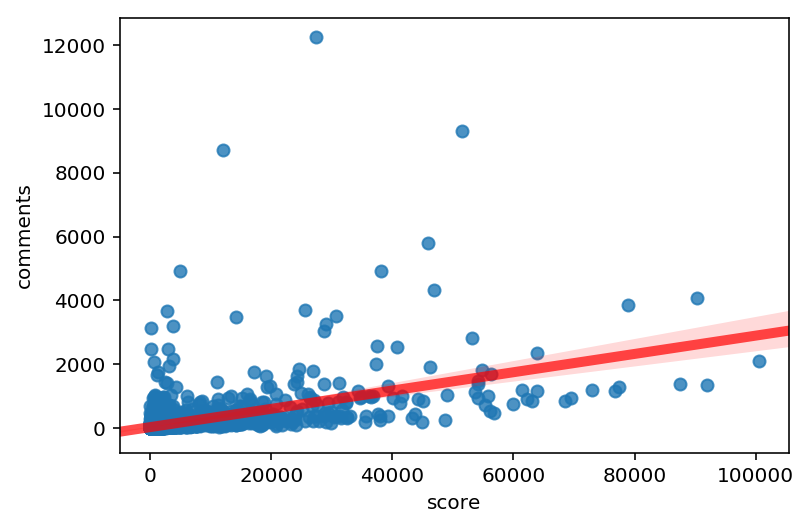

In [759]:
sns.regplot(x=reddithot["score"], y=reddithot["comments"], line_kws={"color":"r","alpha":0.7,"lw":5})
#sns.plt.show()


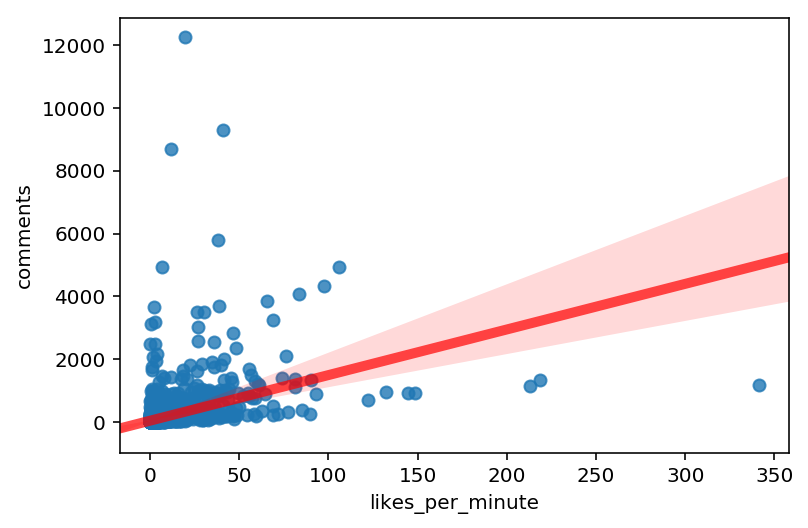

In [761]:
sns.regplot(x=reddithot["likes_per_minute"], y=reddithot["comments"], line_kws={"color":"r","alpha":0.7,"lw":5})
#sns.plt.show()

In [762]:
np.mean(reddit_random.comments.values)

18.652071404513304

In [763]:
np.median(reddit_random.comments.values)

6.0

In [764]:
np.mean(reddithot.comments.values)

79.648202614379088

In [765]:
np.median(reddithot.comments.values)

17.0

In [767]:
ggh = pd.DataFrame({'df':['Hot', 'Random'], 'Mean':[np.mean(reddithot.comments.values), np.mean(reddit_random.comments.values)], 
              'Median':[np.median(reddithot.comments.values), np.median(reddit_random.comments.values)]})

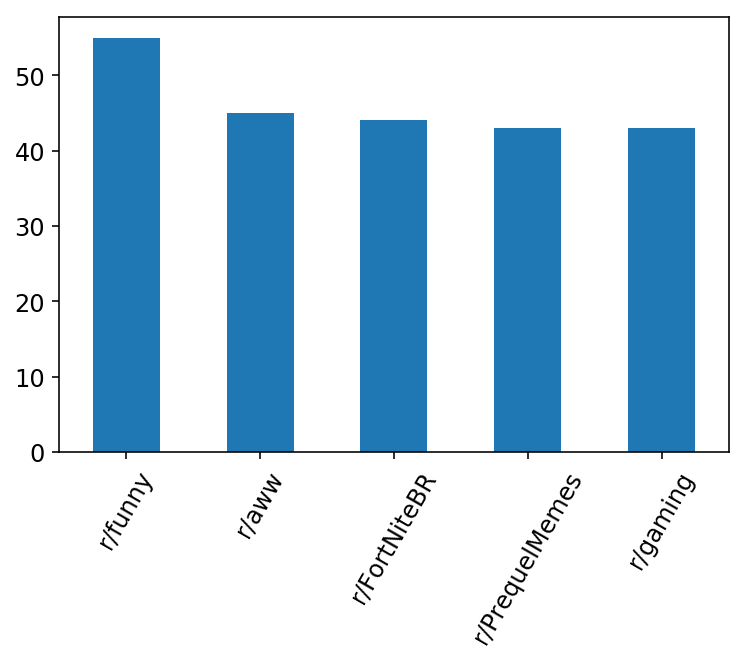

In [804]:
reddithot.sort_values('subreddits', ascending=False)['subreddits'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=60)
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

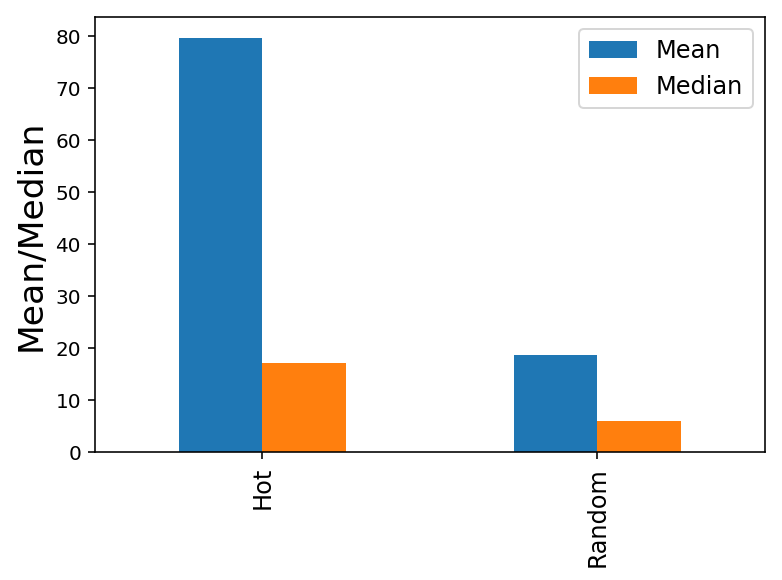

In [781]:
ggh.groupby('df').mean().plot(kind='bar')
plt.legend(fontsize = 'large') # Legend
plt.xlabel('', fontsize = 'xx-large')
plt.ylabel('Mean/Median', fontsize = 'xx-large')
plt.rc('xtick', labelsize='large')

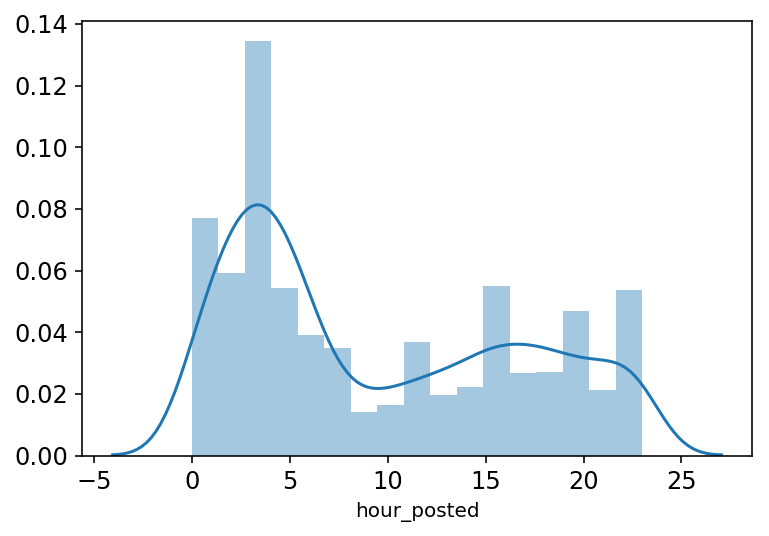

In [946]:
sns.distplot( reddithotreddithot["hour_posted"] )


# Executive Summary
---
Put your executive summary in a Markdown cell below.

This project was completed by:

1. Building a webscraper and scraping Reddit

2. Analyzing/Cleaning the scraped data

3. Building a Random Forest Model and Evaluating it. 

1.

To better understand the differnt between 'hot' posts and 'normal' posts I built two scrapers. The first of these simply scraped the hot page of Reddit. I ran my scraper for about 9 hours using a cloud computing service called Python Anywhere. The second scraper attempted to take a random sample of 'recent' Reddit posts. I did this by first going to a random subthread, then 'hitting the next button' a random number of times (only up to 5 times) and then taking a random post from the page.

2.

I cleaned the data and created several features which I thought would be important to the overall presentation. I created rate data for both upvotes and comments and created a target variable for the 'hot' data which was all poss that had above a median number of comments.

3.

I created two Random Forest models, one looking at comments in the 'hot' data that were above the median amount of comments for that data and one looking at 'hot' vs. 'normal' posts.